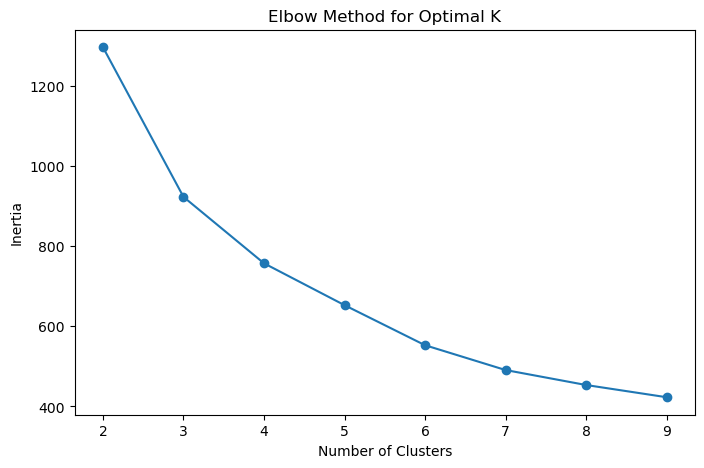

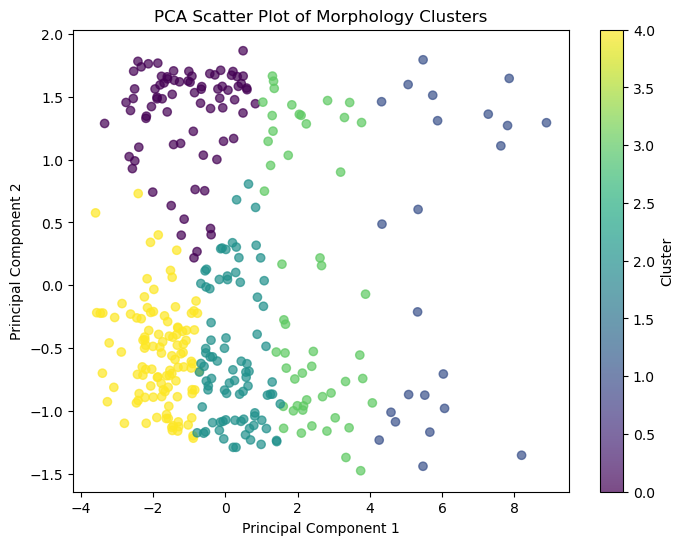

area               perimeter            aspect_ratio  \
                mean         std        mean        std         mean   
cluster                                                                
0        1168.662338  386.133826  142.426280  30.973933     2.111228   
1        3455.826087  717.716876  392.864576  60.698628     7.227957   
2        1600.383721  330.875600  185.807908  22.332058     3.087824   
3        2352.942308  583.207675  258.575531  35.935308     4.437846   
4         890.412844  269.128883  120.026542  22.636811     1.870611   

                  circularity            solidity            \
              std        mean       std      mean       std   
cluster                                                       
0        0.609021    0.725932  0.110349  0.943495  0.031523   
1        1.755254    0.286579  0.051214  0.778410  0.076568   
2        0.617279    0.583238  0.076137  0.936051  0.027535   
3        0.884161    0.442618  0.073514  0.900257  0.040605   
4        0.379238    0.768480  0.077995  0.953549  0.012829   

        equivalent_diameter           orientation            
                       mean       std        mean       std  
cluster                                                      
0                 38.022843  6.542661    1.134715  0.415719  
1                 66.002354  6.765637    0.034740  1.272826  
2                 44.895694  4.723128   -0.820861  0.576402  
3                 54.315205  6.827451   -0.139683  1.098475  
4                 33.224860  5.485762   -0.920962  0.403512

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the CSV file
df = pd.read_csv('heyo.csv')

# Drop non-numeric and irrelevant columns
if 'morphology_class' in df.columns:
    df = df.drop(columns=['morphology_class'])  # Ignore manual classifications

# Select relevant morphology metrics
features = ['area', 'perimeter', 'aspect_ratio', 'circularity', 'solidity', 'equivalent_diameter', 'orientation']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using the elbow method
inertia = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Fit KMeans with optimal K (to be chosen based on the elbow graph)
optimal_k = 5  # We will adjust this based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Compute cluster statistics
cluster_stats = df.groupby('cluster')[features].agg(['mean', 'std'])

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

# Plot PCA Scatter
plt.figure(figsize=(8, 6))
plt.scatter(df['PC1'], df['PC2'], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot of Morphology Clusters')
plt.show()

# Display cluster statistics
display(cluster_stats)
